# Session \#3 - Homework

This is the homework proposed in the <a href=https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/03-classification/homework.md>week 3</a> of Zoomcamp 2022 version by <a href=https://datatalks.club/>DataTalks.Club </a>.

More information on the 2022 edition can be found in this <a href = https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp>repo </a>. 

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.


### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task. 
 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [4]:
categories = ['latitude',
              'longitude',
              'housing_median_age',
              'total_rooms',
              'total_bedrooms',
              'population',
              'households',
              'median_income',
              'ocean_proximity',
              'median_house_value'
             ]
df = df[categories]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [5]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
df = df.fillna(0)
df.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [7]:
#Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df['total_rooms']/df['households']
#Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
#Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population']/df['households']

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [8]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [9]:
df_numerical = df.select_dtypes(include='number')
df_numerical.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [10]:
#!conda install -c intel scikit-learn -y

In [11]:
#conda update -n base -c defaults conda -y

In [12]:
#Correlation matrix for the numerical features
df_numerical.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


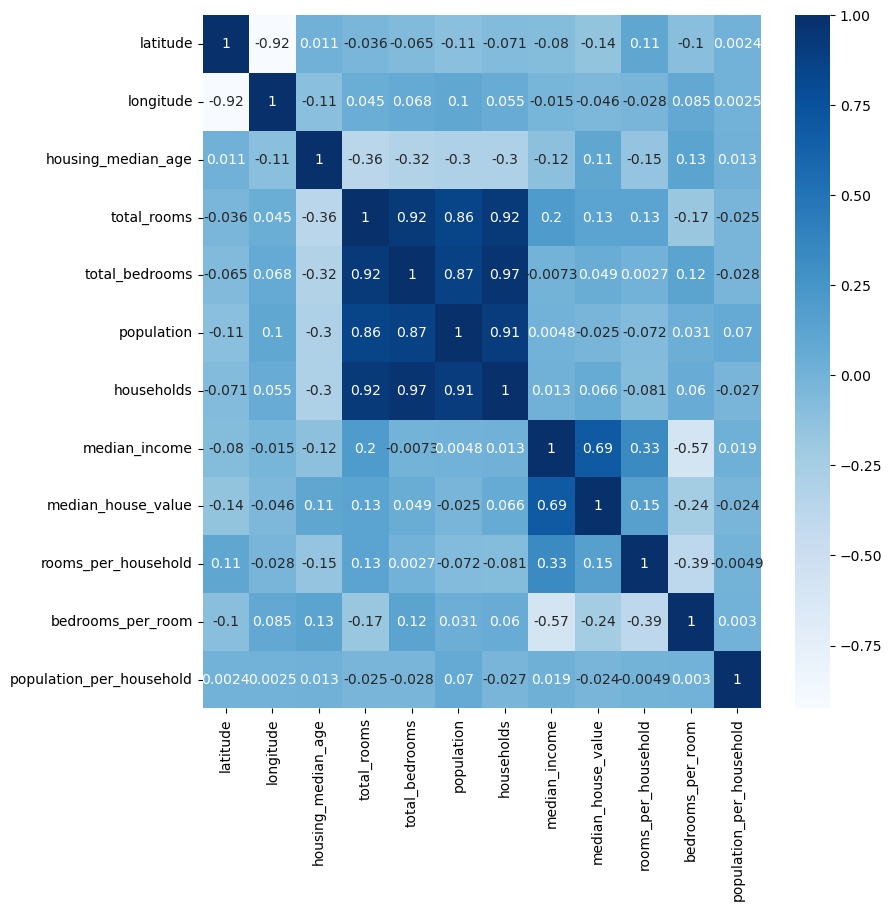

In [13]:
plt.figure(figsize=([9,9]))
sns.heatmap(df_numerical.corr(),cmap='Blues',annot=True)
plt.show()

Accordingly to the correlation matrix above, the biggest correlation is between variables <code>total_bedrooms</code> and <code>households</code>

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [14]:
median_house_value_mean = df.median_house_value.mean()

In [15]:
df['binary_median_house_value'] = np.where(df.median_house_value > median_house_value_mean,1,0)
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,binary_median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0,6.281853,0.172096,2.181467,1


In [16]:
df.binary_median_house_value.value_counts(normalize=True)

0    0.59375
1    0.40625
Name: binary_median_house_value, dtype: float64

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

In [19]:
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

In [20]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [21]:
y_numeric_train = df_train.median_house_value
y_numeric_val = df_val.median_house_value
y_numeric_test = df_test.median_house_value

y_train = df_train.binary_median_house_value
y_val = df_val.binary_median_house_value
y_test = df_test.binary_median_house_value

df_train = df_train.drop(labels = ['binary_median_house_value','median_house_value'], axis = 1)

df_val = df_val.drop(labels = ['binary_median_house_value','median_house_value'], axis = 1)

df_test = df_test.drop(labels = ['binary_median_house_value','median_house_value'], axis = 1)

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [24]:
score = mutual_info_score(df_train.ocean_proximity,y_train)
print(round(score,2))

0.1


### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [26]:
ohe = OneHotEncoder()
transformed_train = ohe.fit_transform(df_train[['ocean_proximity']])
print(transformed_train.toarray())

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [27]:
# Getting one hot encoded categories
print(ohe.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [28]:
df_train[ohe.categories_[0]] = transformed_train.toarray()
df_train = df_train.drop(labels='ocean_proximity',axis=1)

########## Let's transform df_val and df_test

transformed_val = ohe.transform(df_val[['ocean_proximity']])
df_val[ohe.categories_[0]] = transformed_val.toarray()
df_val = df_val.drop(labels='ocean_proximity',axis=1)

transformed_test = ohe.transform(df_test[['ocean_proximity']])
df_test[ohe.categories_[0]] = transformed_test.toarray()
df_test = df_test.drop(labels='ocean_proximity',axis=1)

In [29]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(df_train,y_train)
y_pred = model.predict(df_val)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print(f'Accuracy score: {round(accuracy_score(y_val,y_pred),2)}')

Accuracy score: 0.84


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [32]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [33]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(df_train,y_train)
y_pred = model.predict(df_val)

model_accuracy = accuracy_score(y_val,y_pred)

columns = ['latitude','longitude','housing_median_age', 'total_rooms', 'total_bedrooms',
           'population', 'households', 'median_income', 'rooms_per_household',
           'bedrooms_per_room', 'population_per_household']

score = {}
score_diff = {}
for column in columns:
    X_train = df_train.copy()
    X_train = X_train.drop(labels=column,axis=1)
    X_val = df_val.copy()
    X_val = X_val.drop(labels=column,axis=1)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    #accuracy_score(y_val,y_pred)
    score[column] = round(accuracy_score(y_val,y_pred),2)
    score_diff[column] = abs(accuracy_score(y_val,y_pred) - model_accuracy)

print(score)

{'latitude': 0.83, 'longitude': 0.83, 'housing_median_age': 0.83, 'total_rooms': 0.84, 'total_bedrooms': 0.84, 'population': 0.83, 'households': 0.83, 'median_income': 0.79, 'rooms_per_household': 0.84, 'bedrooms_per_room': 0.84, 'population_per_household': 0.84}


In [34]:
score_diff

{'latitude': 0.0021802325581394832,
 'longitude': 0.003875968992248069,
 'housing_median_age': 0.005087209302325535,
 'total_rooms': 0.0,
 'total_bedrooms': 0.001211240310077577,
 'population': 0.01017441860465118,
 'households': 0.003633720930232509,
 'median_income': 0.05087209302325579,
 'rooms_per_household': 0.0,
 'bedrooms_per_room': 0.001211240310077466,
 'population_per_household': 0.0009689922480620172}

   >Accordingly to the data above, the minimum difference occured for <code> total_rooms </code>

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [35]:
y_numeric_train = np.log1p(y_numeric_train)
y_numeric_val = np.log1p(y_numeric_val)
y_numeric_test = np.log1p(y_numeric_test)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

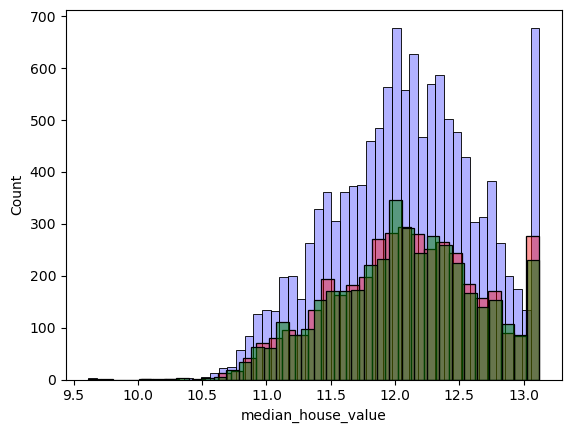

In [36]:
sns.histplot(y_numeric_train,color='blue',alpha=0.3)
sns.histplot(y_numeric_val,color='red',alpha=0.4)
sns.histplot(y_numeric_test,color='green',alpha=0.5)

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [38]:
alpha = [0, 0.01, 0.1, 1, 10]
score = {}
for a in alpha:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train,y_numeric_train)
    y_pred = model.predict(X_val)
    score[a] = round(mean_squared_error(y_numeric_val,y_pred, squared= False),11)
print(score)

{0: 0.52452498626, 0.01: 0.52452498628, 0.1: 0.52452498643, 1: 0.52452498798, 10: 0.52452500342}


Accordingly to the results above, the best alpha is <b>0.0</b>

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

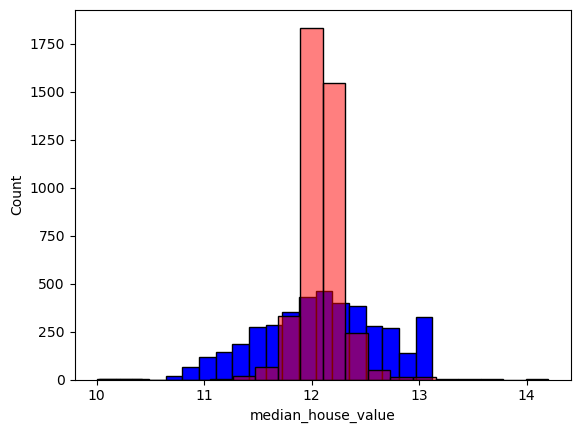

In [39]:
sns.histplot(y_numeric_val,alpha=1,color='blue',bins = 20)
sns.histplot(y_pred,alpha=0.5,color = 'red',bins = 20)

## Submit the results

* Submit your results here: https://forms.gle/vQXAnQDeqA81HSu86
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 26 September (Monday), 23:00 CEST.

After that, the form will be closed.